In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = sns.load_dataset('iris')
df.head(10)

In [3]:
df.shape

(150, 5)

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

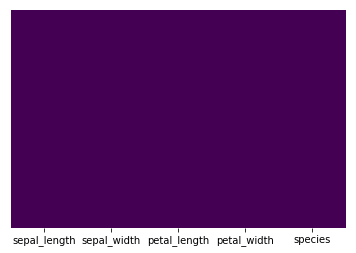

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


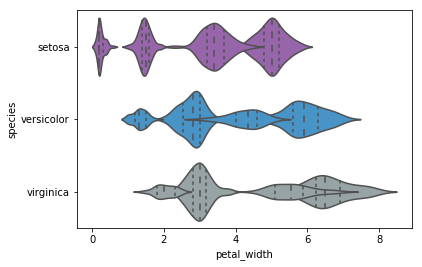

In [23]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
violin = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile',palette = flatui)
violin = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile',palette = flatui)
violin = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile',palette = flatui)
violin = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile',palette = flatui)

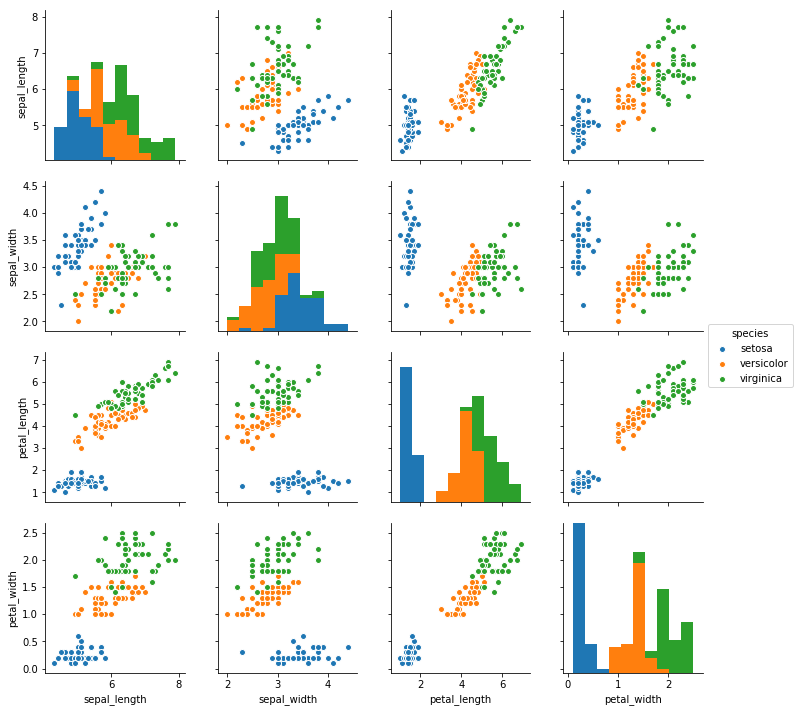

In [17]:
sns.pairplot(df, hue="species")

In [21]:
df["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [98]:
from sklearn.cross_validation import train_test_split
df_feat =pd.DataFrame(df, columns =df.columns[:-1])
X = df_feat
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=800)

In [99]:
X_train.count()

sepal_length    105
sepal_width     105
petal_length    105
petal_width     105
dtype: int64

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred =knn.predict(X_test)


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred,labels=["setosa", "versicolor", "virginica"]))
print(classification_report(y_test,pred))
pred.tolist
type(pred)
import numpy as np
unique, counts = np.unique(pred, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

[[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.94      1.00      0.97        16
  virginica       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45

{'setosa': 14, 'versicolor': 17, 'virginica': 14}
{'setosa': 14, 'versicolor': 16, 'virginica': 15}


In [102]:
## improve accuracy
## Elbow method
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

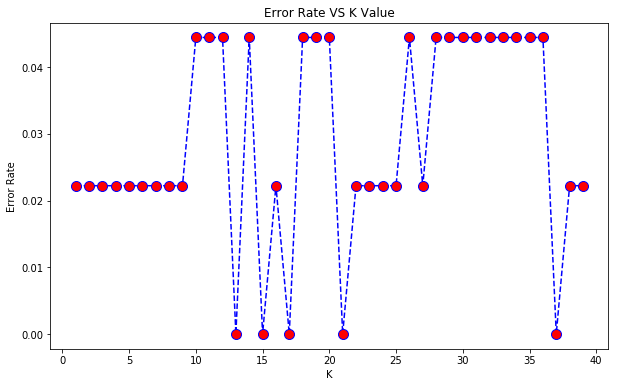

In [79]:
##plot error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker = 'o',
         markerfacecolor = 'red',markersize =10)
plt.title('Error Rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')